In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('Adult_story/adult.csv', sep=',', header=0)

# Introduction

This data set contains information about adults'income. The age, workclass, education, marital status, occupation, relationship, race, gender, the hours per week that they work, and their country of origin are given as well as their income bracket (>50K or <=50K). In this project, we would like to investigate if each of these attributes affects is related to the income. Particularly, two important trends to investigate are how the income is related to race or gender.

In [5]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [9]:
df.shape

(48842, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [37]:
df.education.value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [10]:
#Calculate the correlation coefficients
corr =df.corr()
corr.round(2).style.background_gradient(cmap='coolwarm')

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.080000,0.030000,0.080000,0.060000,0.070000
fnlwgt,-0.080000,1.000000,-0.040000,-0.000000,-0.000000,-0.010000
educational-num,0.030000,-0.040000,1.000000,0.130000,0.080000,0.140000
capital-gain,0.080000,-0.000000,0.130000,1.000000,-0.030000,0.080000
capital-loss,0.060000,-0.000000,0.080000,-0.030000,1.000000,0.050000
hours-per-week,0.070000,-0.010000,0.140000,0.080000,0.050000,1.000000


# Income by gender

In [66]:
df['income_new'] = df['income'].map({'>50K': 1, '<=50K': 0})
#df.head()

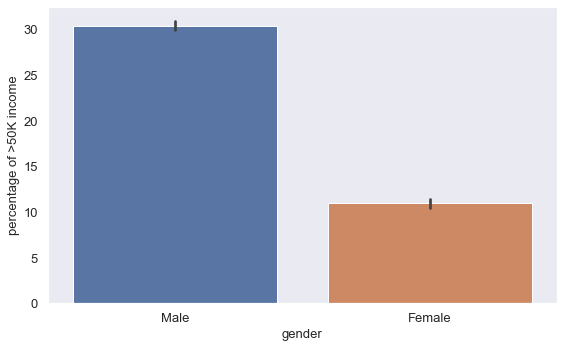

In [70]:
sns_plot=sns.barplot(y='income_new', x='gender', data=df[['gender','income_new']],estimator=lambda x: sum(x==1)*100.0/len(x))
sns_plot.set(ylabel='percentage of >50K income')
plt.tight_layout()
plt.show()

The bar chart above clearly shows the gender pay gap. The percentage of high paid male employees is 30% and the percentage of high paid female employees is 10%.

# Income by race

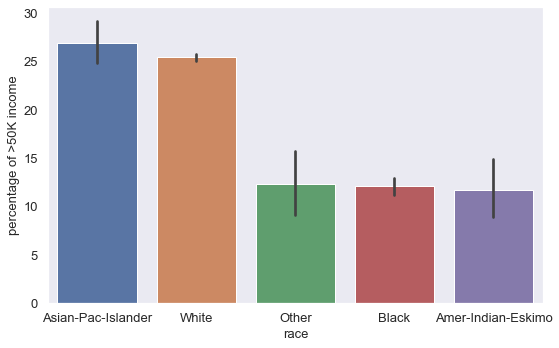

In [72]:
sns_plot=sns.barplot(y='income_new', x='race', data=df[['race','income_new']],order=df[['race', 'income_new']].groupby('race').mean().sort_values(by='income_new', ascending=False).index.values, estimator=lambda x: sum(x==1)*100.0/len(x))
#sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation=40, ha="right")
sns_plot.set(ylabel='percentage of >50K income')
plt.tight_layout()
plt.show()

The bar chart above shows that Asian-Pacific islanders and white employees have the highest percentage of high paid jobs.

# Income by work hours per week

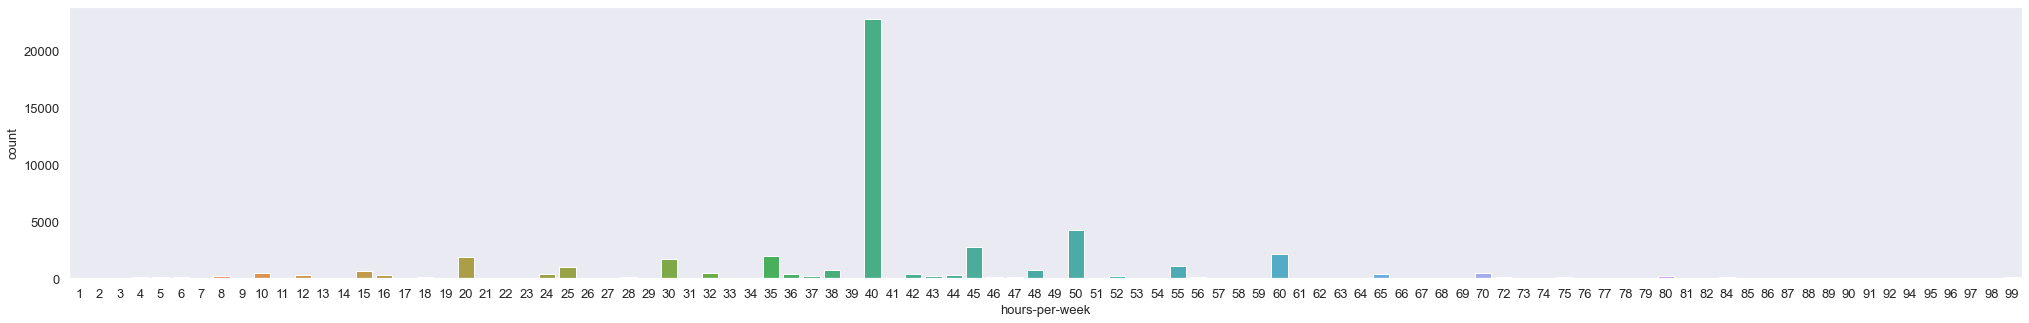

In [21]:
plt.figure()
sns.set(rc={'axes.grid':False, 
            'axes.labelsize':13,
            'figure.figsize':(35, 5),
            'xtick.labelsize':13,
            'ytick.labelsize':13})
sns_plot=sns.countplot(x='hours-per-week', data=df)
#plt.xticks([0,1], ['No', 'Yes'], fontsize=13)
plt.xlabel("hours-per-week")
#sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [64]:
df['hours-per-week'].value_counts()

40    22803
50     4246
45     2717
60     2177
35     1937
      ...  
69        1
94        1
79        1
82        1
87        1
Name: hours-per-week, Length: 96, dtype: int64

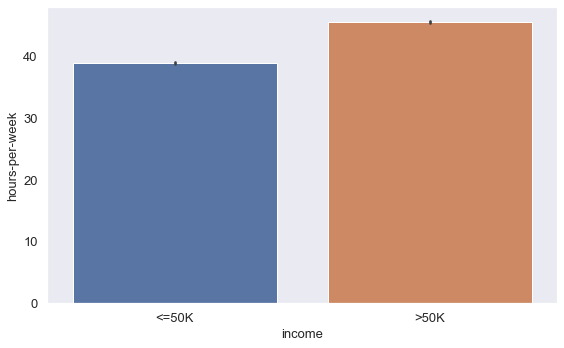

In [27]:
sns.set(rc={'axes.grid':False, 
            'axes.labelsize':13,
            'figure.figsize':(8, 5),
            'xtick.labelsize':13,
            'ytick.labelsize':13})
sns_plot=sns.barplot(x='income', y='hours-per-week', data=df[['hours-per-week','income']])
#sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation=40, ha="right")
#sns_plot.set(ylabel='percentage of positive outcome')
plt.tight_layout()
plt.show()
fig = sns_plot.get_figure()

The high paid employees (>50K) work more hours per week compared to low paid employees (<=50K).

# Income by education

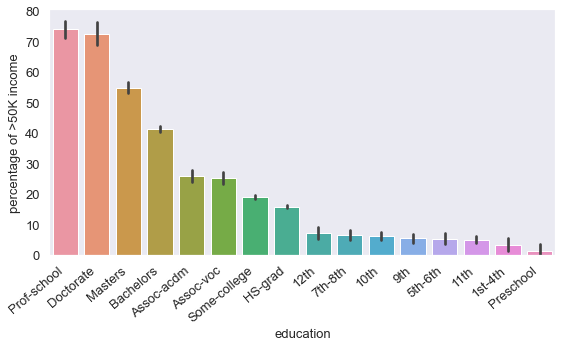

In [77]:
order=['Doctorate', 'Masters','Bachelors','Assoc-acdm','Assoc-voc','Some-college','Prof-school', 'HS-grad','12th', '11th','10th','9th','7th-8th','5th-6th','1st-4th','Preschool']
sns_plot=sns.barplot(y='income_new', x='education', data=df[['education','income_new']],order=df[['education', 'income_new']].groupby('education').mean().sort_values(by='income_new', ascending=False).index.values, estimator=lambda x: sum(x==1)*100.0/len(x))
sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation=40, ha="right")
sns_plot.set(ylabel='percentage of >50K income')
plt.tight_layout()
plt.show()
fig = sns_plot.get_figure()

The chart above shows a clear trend of higher income for higher education.